# Field of Streams Approach

In [1]:
from Analysis import query_gaia_halo_rgb
from Analysis import reddening_correction
from Analysis import halo_rgb_filter
from Analysis import plot_sky_density

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
rerun_gaia = False

### Limits of RA and DEC from Field of Stream

In [3]:
# Field of stream global boundaries
fs_ra_min, fs_ra_max = 120.0, 220.0  # degrees
fs_dec_min, fs_dec_max = -10.0, 50.0  # degrees

### Gaia Query - Do Not Require Radial Velocity Info

In [4]:
if rerun_gaia:
    field_streams_non_rv = query_gaia_halo_rgb(ra_min = fs_ra_min, ra_max = fs_ra_max, dec_min = fs_dec_min, dec_max = fs_dec_max, g_max=22.5, parallax_max=1.0, ruwe_max=1.4, chunk_size=5, radial_velocity = False , save_path = 'data/FS_gaia_non_rv.csv')

### Gaia Query - Do Not Require Radial Velocity Info

In [5]:
if rerun_gaia:
    field_streams_rv = query_gaia_halo_rgb(ra_min = fs_ra_min, ra_max = fs_ra_max, dec_min = fs_dec_min, dec_max = fs_dec_max, g_max=22.5, parallax_max=1.0, ruwe_max=1.4, chunk_size=5, radial_velocity = True , save_path = 'data/FS_gaia_rv.csv')

### Re-Extract Data

In [6]:
# --------------- Re-Load Gaia Data from file ---------------
FS_gaia_non_rv = pd.read_csv('data/FS_gaia_non_rv.csv')
# FS_gaia_rv = pd.read_csv('FS_gaia_rv.csv')

### Preform Extinction/ Reddening Correction

In [7]:
# Dereddened magnitudes and store the results
FS_gaia_non_rv_dered = reddening_correction(FS_gaia_non_rv)

### Further filter for Red Giant Branch stars

In [8]:
FS_gaia_halo = halo_rgb_filter(FS_gaia_non_rv_dered, min_br=1, max_br=2.5, min_abs_mag=3, halo_radius_min=15, halo_radius_max=300, pm_min = 5)

Total stars before filtering: 18667
Stars passing BP-RP color filter: 18493 (99.07%)
Stars passing absolute magnitude filter: 18570 (99.48%)
Stars passing halo distance filter: 2638 (14.13%)
Stars passing proper motion filter: 10917 (58.48%)
Stars passing all filters: 2405 (12.88%)


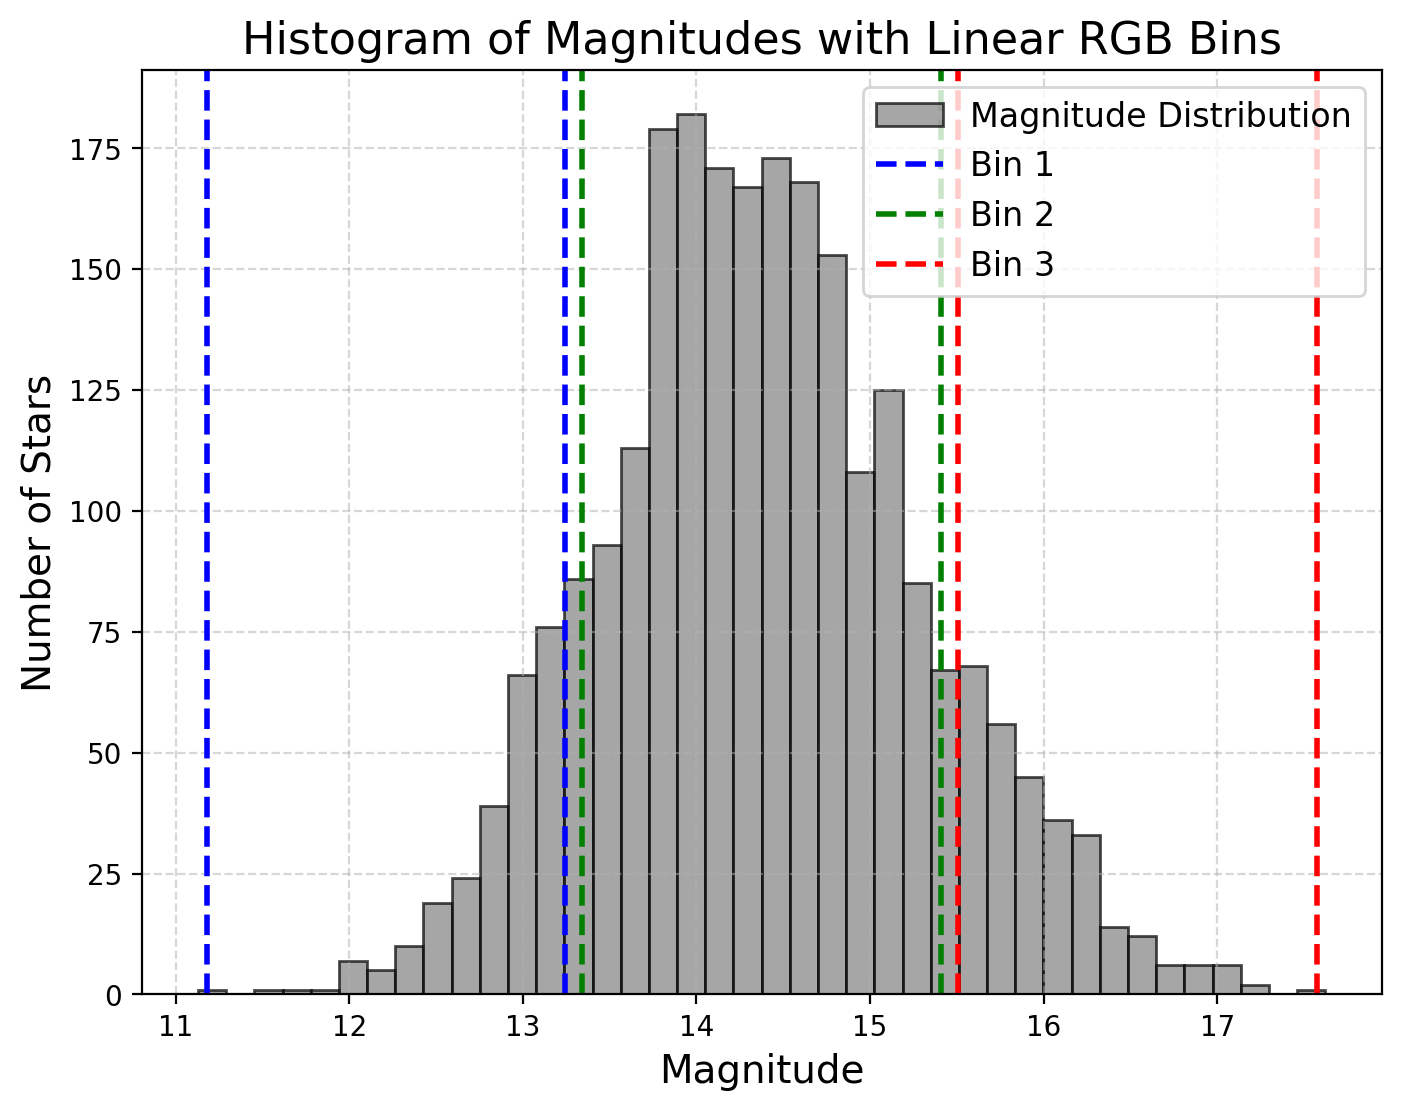

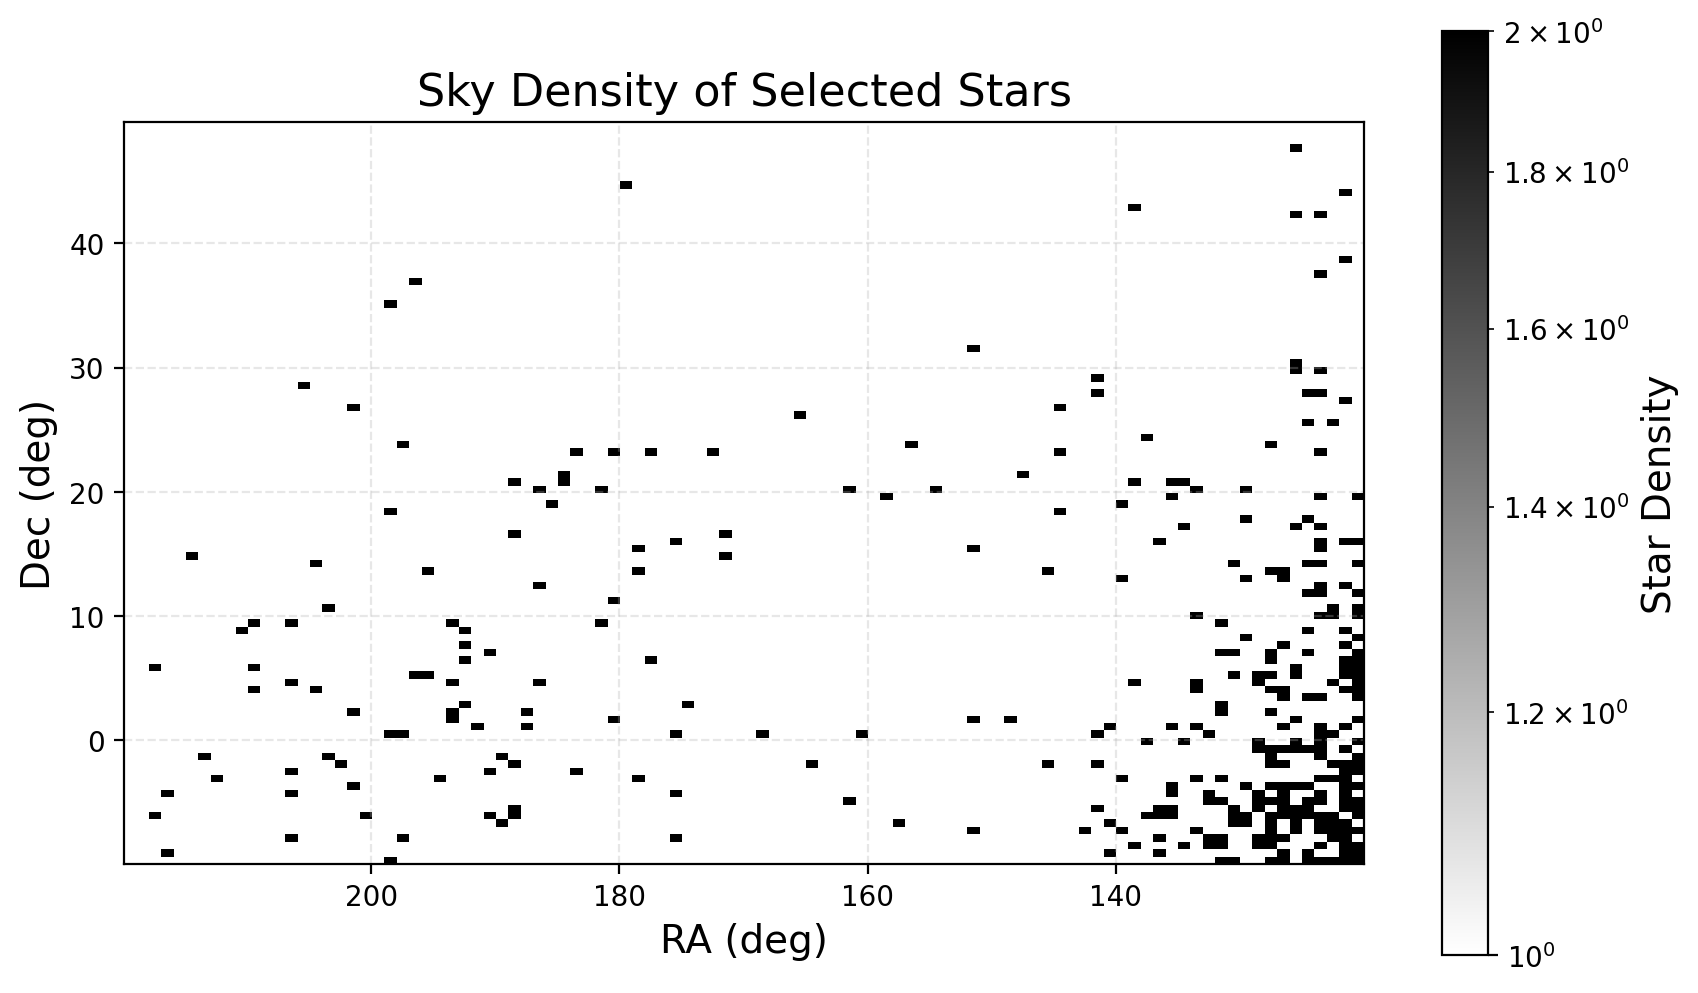

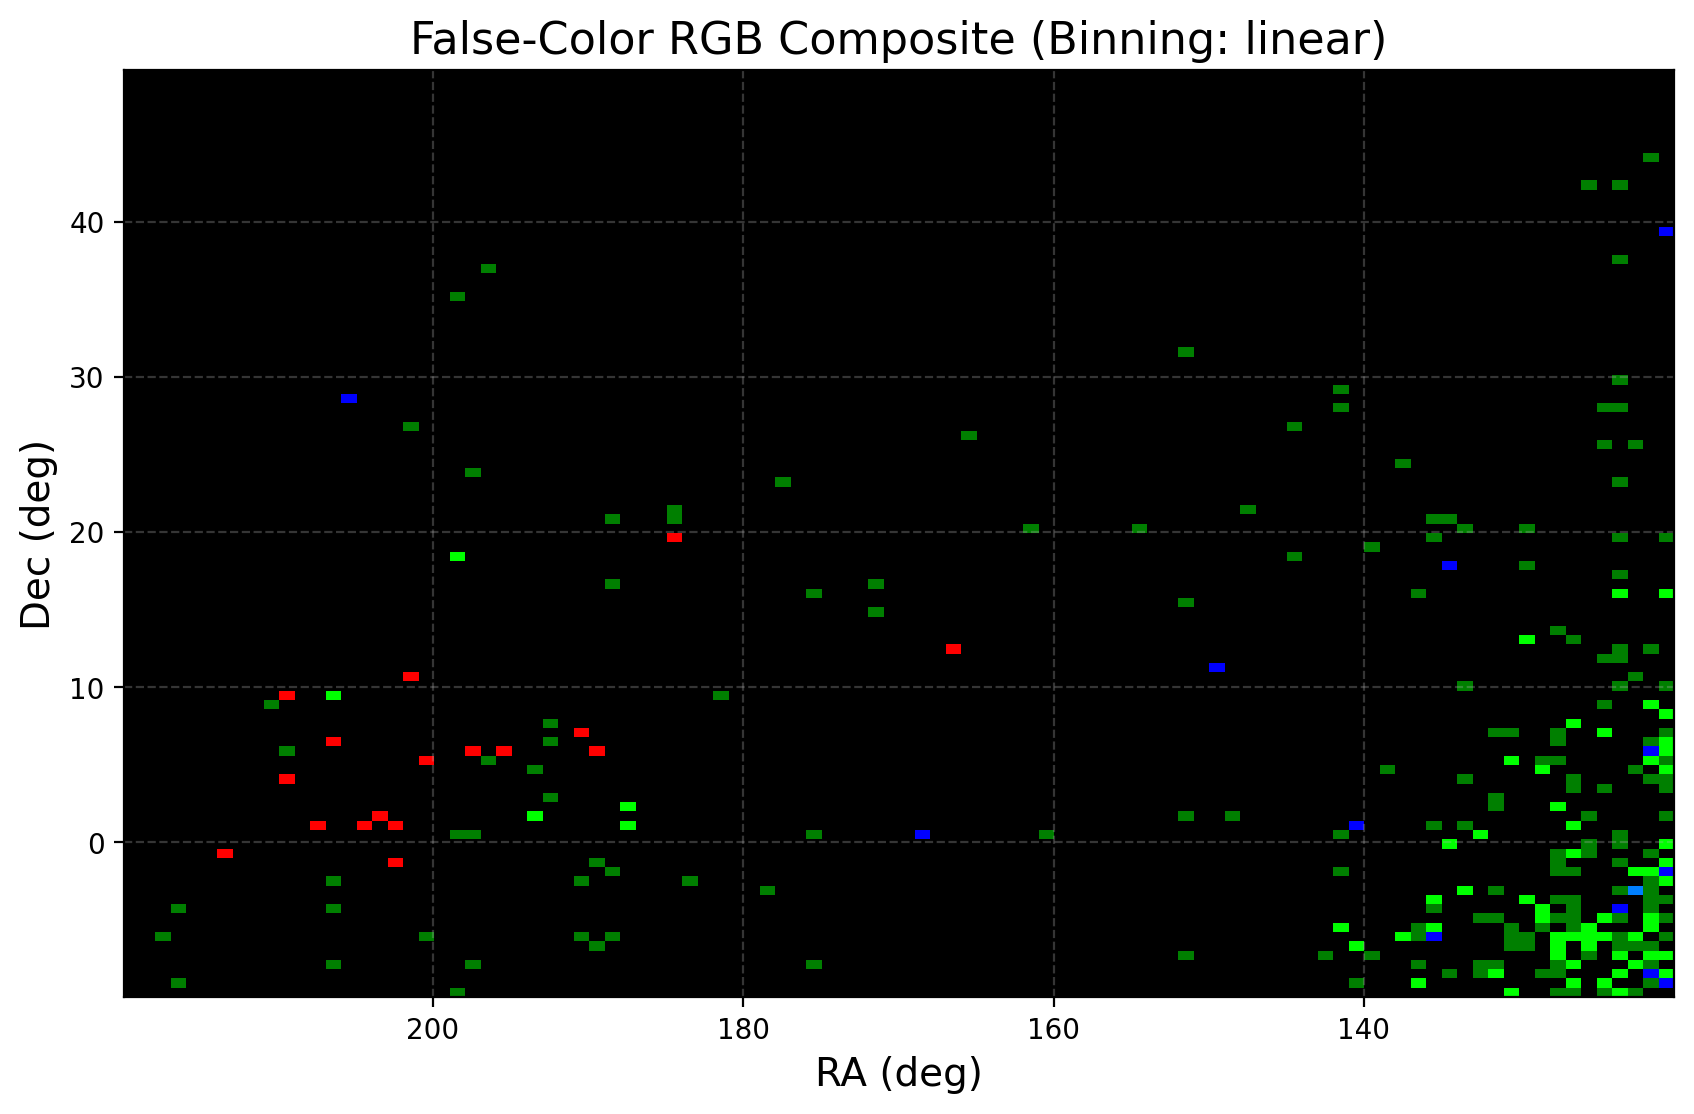

In [16]:
plot_sky_density(FS_gaia_halo, bins=100, contrast=(5, 95), binning_method="linear", cmap_density="gray_r", cmap_rgb="viridis", log_scale=True)

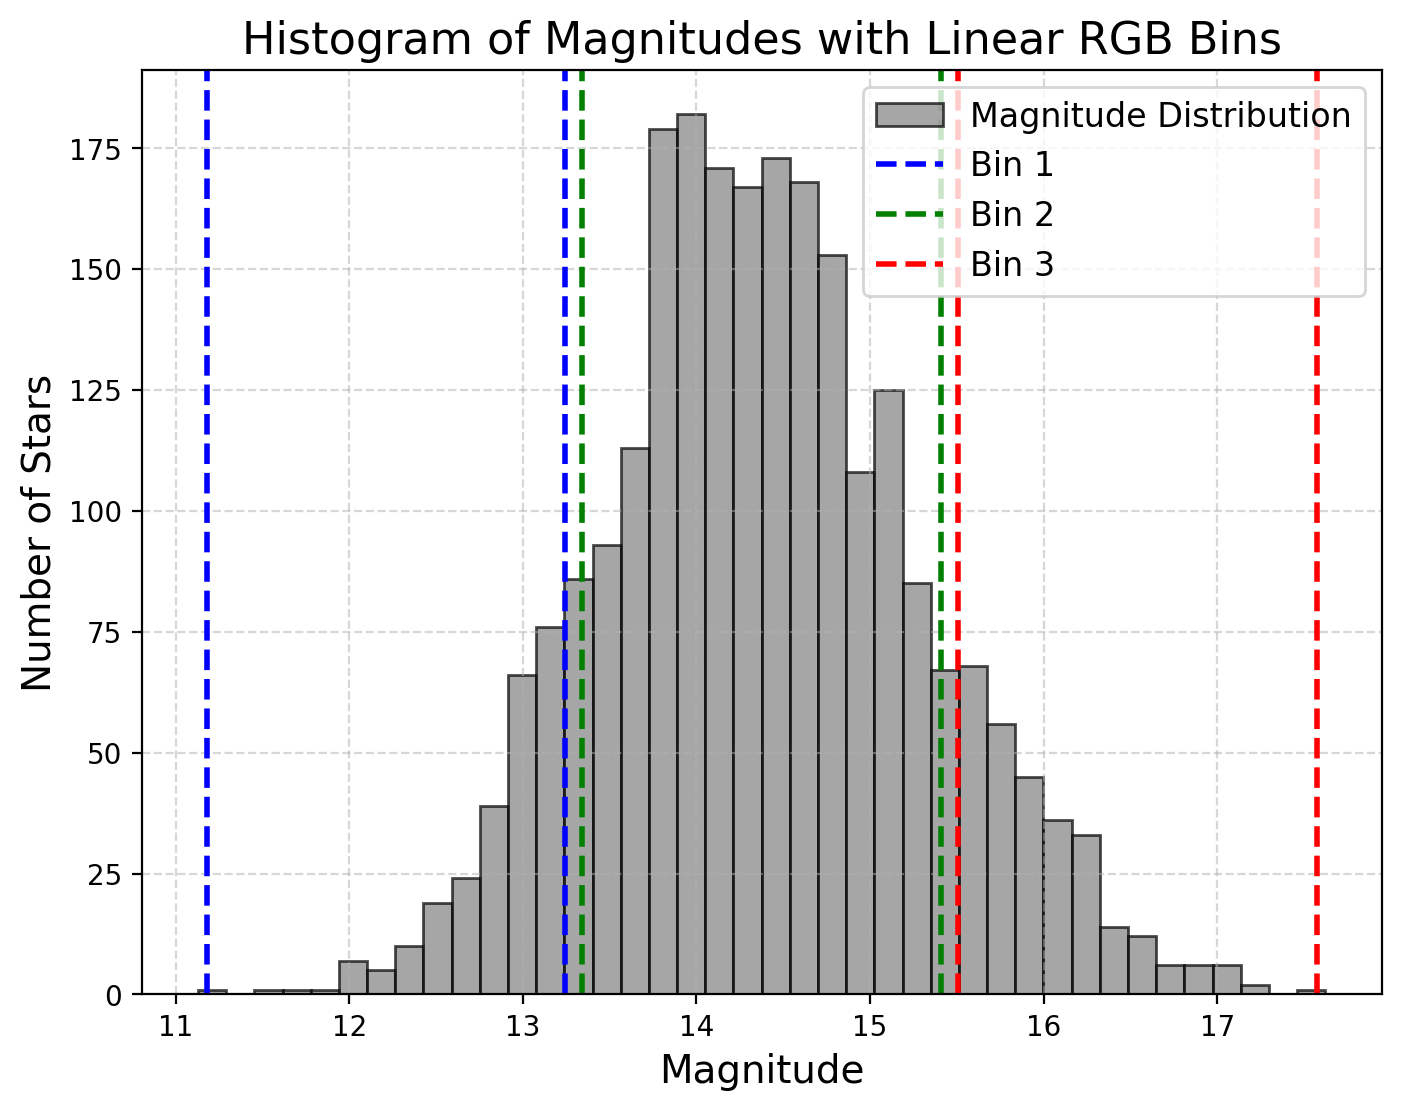

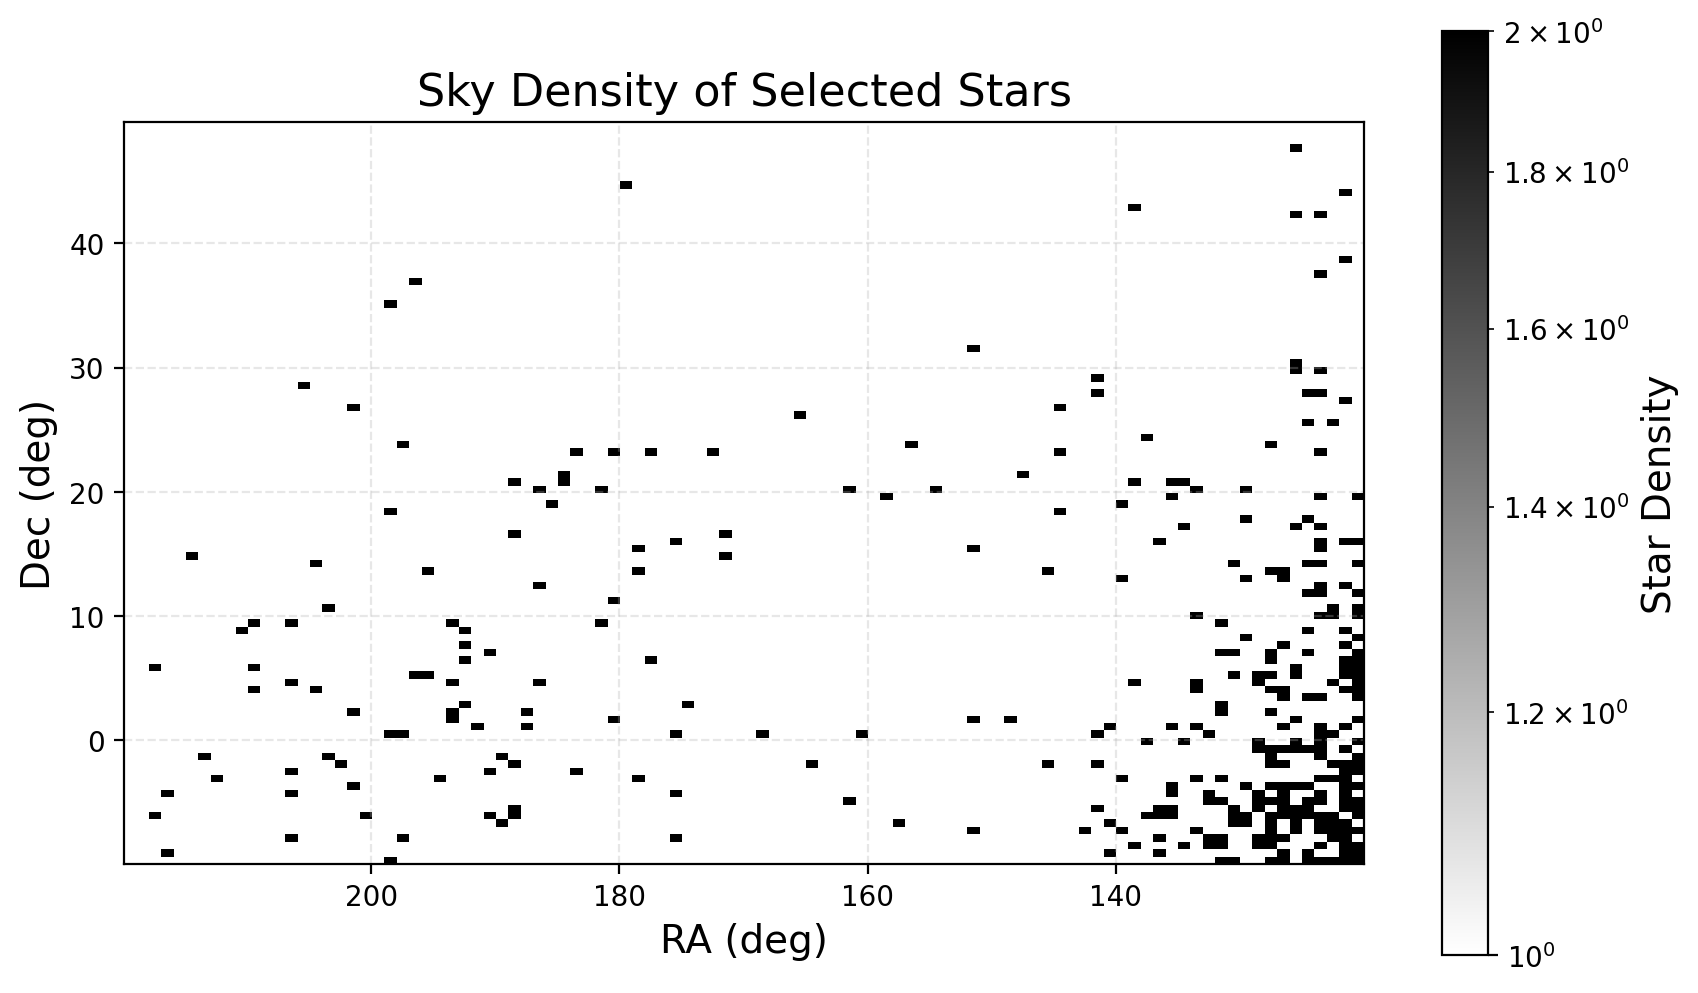

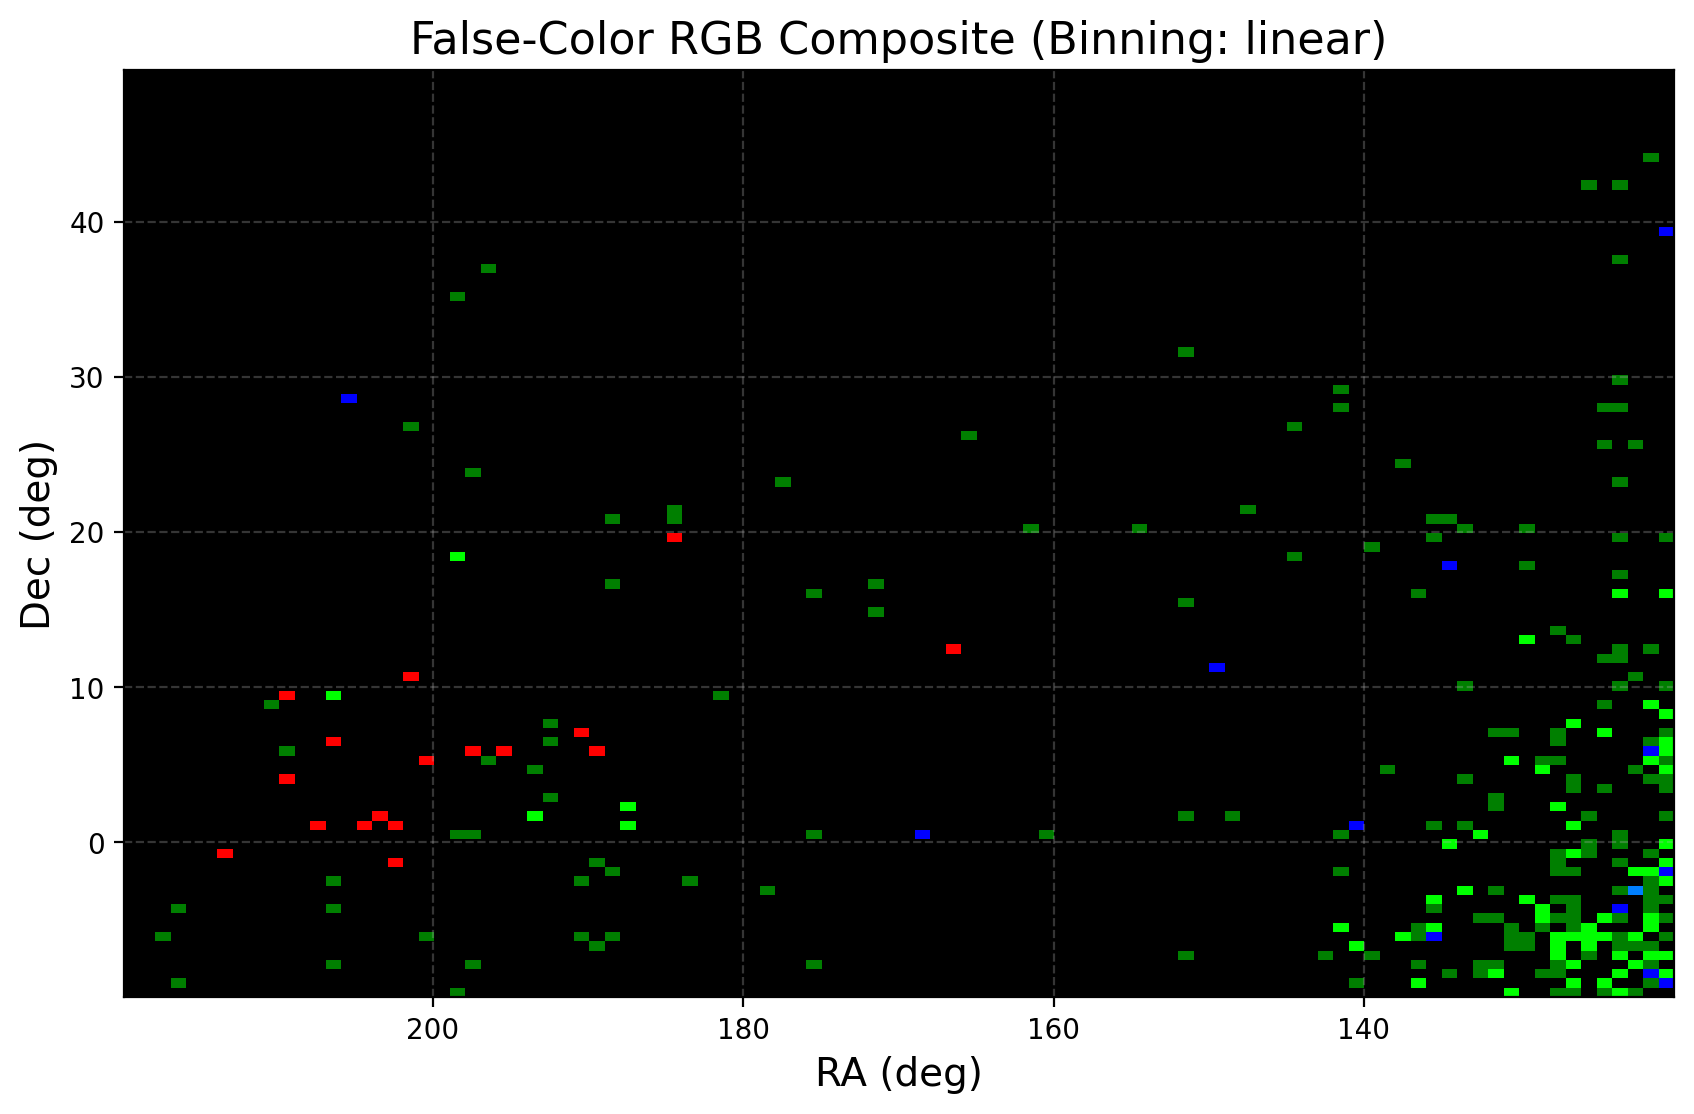

In [10]:
plot_sky_density(FS_gaia_halo, bins=100, contrast=(5, 95), binning_method="linear", cmap_density="gray_r", cmap_rgb="viridis", log_scale=True)

In [12]:
def plot_star_positions(gaia_data, run_label="Halo RGB Selection"):
    """
    Generates two plots:
    1. Sky map of selected stars (RA vs Dec).
    2. Galactic plane distribution (R_gc vs Z_gc).

    Parameters:
        gaia_data (pd.DataFrame): DataFrame containing star positions.
                                  Required columns: 'ra', 'dec', 'R_gc', 'z_gc', 'M_G'.
        run_label (str): Label to annotate the plots.
    """

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Plot 1: Sky map (RA vs Dec)
    axs[0].scatter(gaia_data["ra"], gaia_data["dec"], s=1, alpha=0.5, color="blue")
    axs[0].set_xlabel("Right Ascension (deg)")
    axs[0].set_ylabel("Declination (deg)")
    axs[0].set_title(f"Sky Distribution of Stars ({run_label})")
    axs[0].invert_xaxis()  # RA increases to the left in astronomical convention

    # Plot 2: Galactic Plane (R_gc vs Z_gc)
    scatter = axs[1].scatter(gaia_data["R_gc"], gaia_data["z_gc"], s=1, alpha=0.5, c=gaia_data["M_G"], cmap="inferno")
    axs[1].set_xlabel("Galactocentric Radius R_gc (kpc)")
    axs[1].set_ylabel("Vertical Distance Z_gc (kpc)")
    axs[1].set_title(f"Galactic Plane Distribution ({run_label})")
    axs[1].axhline(0, color='gray', linestyle='--', alpha=0.6)  # Galactic plane
    cbar = plt.colorbar(scatter, ax=axs[1])
    cbar.set_label("Absolute Magnitude (M_G)")

    plt.tight_layout()
    plt.show()

# Example usage (replace 'gaia_data' with your actual dataset)
# plot_star_positions(gaia_data)




In [13]:
len(FS_gaia_halo)

2405

In [14]:
print(FS_gaia_non_rv_col.columns)

NameError: name 'FS_gaia_non_rv_col' is not defined

In [ ]:
gaia_data["dist_pc"] = 1000.0 / gaia_data["parallax"]
gaia_data["M_G"] = gaia_data["dered_G"] - 5 * np.log10(gaia_data["dist_pc"]) + 5



# --------------- Re-Filter Red Giant Branch (RGB) Stars ---------------
mask_bp_bp = (gaia_data['dered_BP'] - gaia_data['dered_RP'] > 1.0) & (gaia_data['dered_BP'] - gaia_data['dered_RP'] < 2.5)
mask_g =  (gaia_data['dered_G'] < 20)

# Apply selection
rgb_stars = gaia_data[mask_rgb]

Querying Gaia DR3 for RA: [0, 360] and Dec: [-90, 90]
Retrieved 2000 stars.
